# NASA TLX General

  controller    modality       mean     median        std        iqr
0        SBC     with VR  46.416667  49.166667  14.109635  21.250000
1        SBC  without VR  35.000000  35.416667  10.914935   4.583333
2        WBC     with VR  51.250000  47.916667  13.305817  10.208333
3        WBC  without VR  34.583333  28.333333  12.670138  18.541667


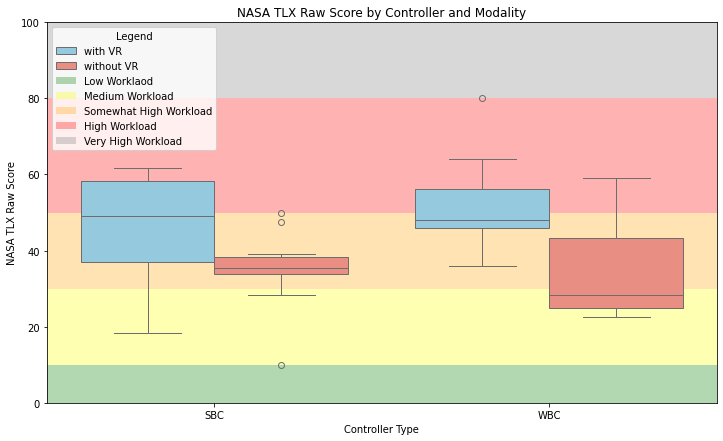

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Load the dataset
file_path = "df_nasa_tlx_combined.csv"  # Replace with the correct path
df = pd.read_csv(file_path)


# Standardizing column names to lowercase with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Compute the overall NASA TLX raw score as the mean of the six features
df["nasa_tlx_raw_score"] = df[["mental_demand", "physical_demand", "temporal_demand", "performance", "effort", "frustration"]].mean(axis=1)

# Compute statistics for each controller and modality combination
stats_df = df.groupby(["controller", "modality"])["nasa_tlx_raw_score"].agg(
    mean="mean",
    median="median",
    std="std",
    iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)
).reset_index()

# Print the table
print(stats_df)

# Set up the figure and axis
plt.figure(figsize=(12, 7))

# Define colors for each modality
palette = {"with VR": "skyblue", "without VR": "salmon"}

# Create the boxplot
ax = sns.boxplot(x="controller", y="nasa_tlx_raw_score", hue="modality", data=df, palette=palette)

# Define background color bands for different severity levels
plt.axhspan(0, 10, facecolor='green', alpha=0.3, label="Low Worklaod")
plt.axhspan(10, 30, facecolor='yellow', alpha=0.3, label="Medium Workload")
plt.axhspan(30, 50, facecolor='orange', alpha=0.3, label="Somewhat High Workload")
plt.axhspan(50, 80, facecolor='red', alpha=0.3, label="High Workload")
plt.axhspan(80, 100, facecolor='gray', alpha=0.3, label="Very High Workload")

# Set labels and title
plt.xlabel("Controller Type")
plt.ylabel("NASA TLX Raw Score")
plt.ylim(0,100)
plt.title("NASA TLX Raw Score by Controller and Modality")
plt.legend(title="Legend",loc="upper left")

plt.savefig("nasa_tlx_score_boxplot.png", format='png')
# Show the plot
plt.show()
